<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 一元线性回归
以一元为例，$y=w_1x_1+b=w^Tb=w_1x_1+w_0x_0$, 实际使用梯度下降法时可以令$x_0=1$,则求出的$w_0=b$

## 梯度下降法
如何求取梯度？

假设给定模型$h(\theta)=\sum_{j=0}^{n} \theta_{j} x_{j}$以及目标函数(损失函数):$J(\theta)=\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right)^{2}$, 其中$m$表示数据的量，我们目标是为了$J(\theta)$尽可能小，所以这里加上$\frac{1}{2}$为了后面的简化，即$J(\theta)=\frac{1}{2m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right)^{2}$。
那么梯度则为：$$
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_{j}} =-\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) \frac{\partial}{\partial \theta_{j}}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) \\
=-\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) \frac{\partial}{\partial \theta_{j}}\left(\sum_{j=0}^{n} \theta_{j} x_{j}^{i}-y^{i}\right) \\ =-\frac{1}{m} \sum_{i=0}^{m}\left(y^{i}-h_{\theta}\left(x^{i}\right)\right) x_{j}^{i}\\=\frac{1}{m} \sum_{i=0}^{m}\left(h_{\theta}-y^{i}\left(x^{i}\right)\right) x_{j}^{i}
\end{aligned}
$$

设$x$是(m,n)维的矩阵，$y$是(m,1)维度的矩阵，$h_{\theta}$是预测的值，维度与$y$相同，那么梯度用矩阵表示如下:$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}x^{T}(h_{\theta}-y)
$$

## 梯度下降法的过程

![png](https://raw.githubusercontent.com/datawhalechina/machine-learning-toy-code/b36e2a1cba102f27e9212f53172c9922a0ea5380/LinearRegression/BGD.png)


train_y [[0.27354941]
 [0.26944584]
 [0.44418168]
 [0.30469336]
 [0.41731786]
 [0.76580309]
 [0.89863187]
 [0.90895014]
 [0.86412819]
 [0.91112717]
 [0.9383832 ]
 [0.89430256]
 [0.99992917]
 [1.0310377 ]
 [1.11358138]
 [1.16426406]
 [1.14051519]
 [1.15372603]
 [1.2203564 ]
 [1.29623423]
 [1.28548025]
 [1.48512633]
 [1.37325524]
 [1.42702605]
 [1.44237845]
 [1.57653402]
 [1.50770007]
 [1.60636636]
 [1.60072081]
 [1.68727264]]
data_x [[1.         0.0202184 ]
 [1.         0.07103606]
 [1.         0.0871293 ]
 [1.         0.11827443]
 [1.         0.14335329]
 [1.         0.38344152]
 [1.         0.41466194]
 [1.         0.4236548 ]
 [1.         0.43758721]
 [1.         0.46147936]
 [1.         0.52184832]
 [1.         0.52889492]
 [1.         0.54488318]
 [1.         0.5488135 ]
 [1.         0.56804456]
 [1.         0.60276338]
 [1.         0.63992102]
 [1.         0.64589411]
 [1.         0.71518937]
 [1.         0.77815675]
 [1.         0.78052918]
 [1.         0.79172504]
 [1.         0

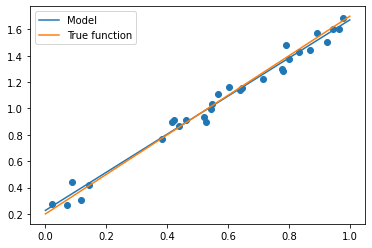

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
train_X = np.sort(np.random.rand(n_samples)) 
train_y = (true_fun(train_X) + np.random.randn(n_samples) * 0.05).reshape(n_samples,1)
print("train_y",train_y)
data_X = []
#𝑤0=𝑏
for x in train_X:
    data_X.append([1,x])
data_X = np.array((data_X))
print("data_x",data_X)
m,n = np.shape(data_X) # m, 数据量 n: 特征数
print(m,n)
maxiter = 1000 # 迭代数
weights = np.ones((n,1))  
alpha = 0.1 # 学习率
for i in range(0,maxiter):
    error = np.dot(data_X,weights)- train_y
    gradient = data_X.transpose().dot(error)/m
    weights = weights - alpha * gradient
print("输出参数w:",weights[1:]) # 输出模型参数w
print("输出参数:b",weights[0]) # 输出参数b


test_X = np.linspace(0, 1, 100)
plt.plot(test_X, test_X*weights[1][0]+weights[0][0], label="Model") 
plt.plot(test_X, true_fun(test_X), label="True function")
plt.scatter(train_X,train_y) # 画出训练集的点
plt.legend(loc="best")

### scikit-learn
scikit-learn，简称sklearn，是一个开源的基于python语言的机器学习工具包。它通过NumPy, SciPy和Matplotlib等python数值计算的库实现高效的算法应用，并且涵盖了几乎所有主流机器学习算法。

官网：https://scikit-learn.org/stable/index.html

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression # 导入线性回归模型
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def true_fun(X):
    return 1.5*X + 0.2

np.random.seed(0) # 随机种子
n_samples = 30
'''生成随机数据作为训练集'''
train_X = np.sort(np.random.rand(n_samples)) 
train_y = true_fun(train_X) + np.random.randn(n_samples) * 0.05

In [3]:
train_X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [4]:
train_y

array([0.27354941, 0.26944584, 0.44418168, 0.30469336, 0.41731786,
       0.76580309, 0.89863187, 0.90895014, 0.86412819, 0.91112717,
       0.9383832 , 0.89430256, 0.99992917, 1.0310377 , 1.11358138,
       1.16426406, 1.14051519, 1.15372603, 1.2203564 , 1.29623423,
       1.28548025, 1.48512633, 1.37325524, 1.42702605, 1.44237845,
       1.57653402, 1.50770007, 1.60636636, 1.60072081, 1.68727264])

In [5]:
train_X[:,np.newaxis]

array([[0.0202184 ],
       [0.07103606],
       [0.0871293 ],
       [0.11827443],
       [0.14335329],
       [0.38344152],
       [0.41466194],
       [0.4236548 ],
       [0.43758721],
       [0.46147936],
       [0.52184832],
       [0.52889492],
       [0.54488318],
       [0.5488135 ],
       [0.56804456],
       [0.60276338],
       [0.63992102],
       [0.64589411],
       [0.71518937],
       [0.77815675],
       [0.78052918],
       [0.79172504],
       [0.79915856],
       [0.83261985],
       [0.87001215],
       [0.891773  ],
       [0.92559664],
       [0.94466892],
       [0.96366276],
       [0.97861834]])

In [6]:
model = LinearRegression() # 定义模型
model.fit(train_X[:,np.newaxis], train_y) # 训练模型

print("输出参数w:",model.coef_) # 输出模型参数w
print("输出参数:b",model.intercept_) # 输出参数b

输出参数w: [1.4474774]
输出参数:b 0.22557541560416694


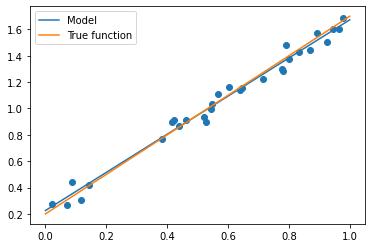

In [7]:
test_X = np.linspace(0, 1, 100)
plt.plot(test_X, model.predict(test_X[:, np.newaxis]), label="Model")
plt.plot(test_X, true_fun(test_X), label="True function")
plt.scatter(train_X,train_y) # 画出训练集的点
plt.legend(loc="best")

### 多元线性回归
以三元为例，$y=w_1x_1+w_2x_2+w_3x_3+b=w^Tb$

In [8]:
from sklearn.linear_model import LinearRegression

X = [[1,1,1],[1,1,2],[1,2,1]]
y = [[6],[9],[8]]
 
model = LinearRegression()
model.fit(X, y)
print("输出参数w:",model.coef_) # 输出参数w1,w2,w3
print("输出参数b:",model.intercept_) # 输出参数b
test_X = [[1,3,5]]
pred_y = model.predict(test_X)
print("预测结果:",pred_y)

输出参数w: [[0. 2. 3.]]
输出参数b: [1.]
预测结果: [[22.]]


### 多项式回归以及过拟合与欠拟合

1. 训练集

用来训练模型内参数的数据集

2. 验证集

用于在训练过程中检验模型的状态，收敛情况，通常用于调整超参数，根据几组模型验证集上的表现决定哪组超参数拥有最好的性能。

同时验证集在训练过程中还可以用来监控模型是否发生过拟合，一般来说验证集表现稳定后，若继续训练，训练集表现还会继续上升，但是验证集会出现不升反降的情况，这样一般就发生了过拟合。所以验证集也用来判断何时停止训练

3. 测试集

测试集用来评价模型泛化能力，即使用训练集调整了参数，之前模型使用验证集确定了超参数，最后使用一个不同的数据集来检查模型。

4. 交叉验证

交叉验证法的作用就是尝试利用不同的训练集/测试集划分来对模型做多组不同的训练/测试，来应对测试结果过于片面以及训练数据不足的问题。

![img2](https://github.com/datawhalechina/machine-learning-toy-code/raw/b36e2a1cba102f27e9212f53172c9922a0ea5380/LinearRegression/cross_valid.png)

socres [-1.15358906 -0.19957154 -0.0442151  -0.36298787 -0.27884536 -0.29893644
 -0.17598593 -0.00857039 -0.24728522 -1.3073027 ]
socres [-0.25174939 -0.04193604 -0.02725282 -0.02934695 -0.00485939 -0.00487645
 -0.01858739 -0.03843547 -0.01218562 -0.00285797]
socres [-1.80522539e+09 -3.37259198e+04 -5.11890381e-03 -6.96763228e-03
 -9.22480383e-03 -6.86000799e-02 -5.07763372e-02 -7.90679606e-02
 -7.39770062e-02 -3.52166975e+03]


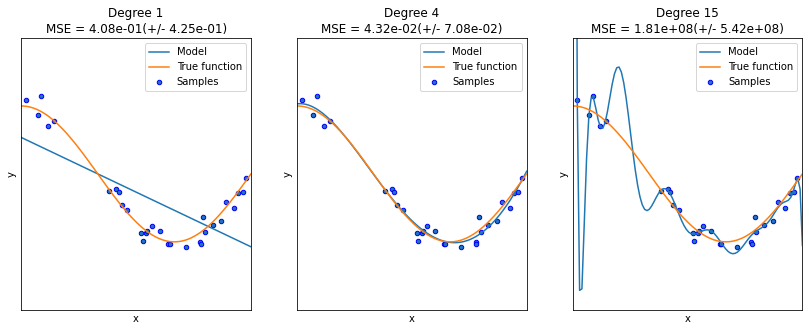

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15] # 多项式最高次

X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False) ##进行特征的构造
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)]) # 使用pipline串联模型
    pipeline.fit(X[:, np.newaxis], y)

    # 使用交叉验证
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    print("socres", scores)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()
